In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [3]:
baseDir = '/content/drive/MyDrive/Time Series Analysis (Mini project)/Time Series Analysis (Mini project)'
datasets = 'Datasets'
datapath1 = 'train_data.csv'
datapath2 = 'test_data'

In [4]:
plt.rc_context({'axes.edgecolor':'#581845', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'#f6eee2', 'font.family' : 'serif'})

In [5]:
path = os.path.join(baseDir, datasets, 'processed_train_data.csv')
df_train = pd.read_csv(path)
df_train


,date,Visits
0,2017-02-23,1425.586871
1,2017-02-24,1364.722321
2,2017-02-25,1427.079577
3,2017-02-26,1589.339190
4,2017-02-27,1806.859110
...,...,...
195,2017-09-06,1202.851223
196,2017-09-07,1276.386932
197,2017-09-08,949.672018
198,2017-09-09,933.878347


In [10]:
from datetime import datetime
df_train['date']=pd.to_datetime(df_train['date'],infer_datetime_format=True)
indexedData = df_train.set_index('date')
indexedData

,Visits
date,
2017-02-23,1425.586871
2017-02-24,1364.722321
2017-02-25,1427.079577
2017-02-26,1589.339190
2017-02-27,1806.859110
...,...
2017-09-06,1202.851223
2017-09-07,1276.386932
2017-09-08,949.672018


# Augemented Dicky Fuller Test

In [11]:
def aug_Dickey_Fuller_test(timeseries):
    
    #Perform Dickey-Fuller test:
    import statsmodels.api as sm
    print('Results of Dickey-Fuller Test:')
    dftest = sm.tsa.adfuller(timeseries['Visits'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

In [12]:
aug_Dickey_Fuller_test(df_train)

Results of Dickey-Fuller Test:
Test Statistic                  -2.303914
p-value                          0.170709
#Lags Used                      14.000000
Number of Observations Used    185.000000
Critical Value (1%)             -3.466201
Critical Value (5%)             -2.877293
Critical Value (10%)            -2.575168
dtype: float64


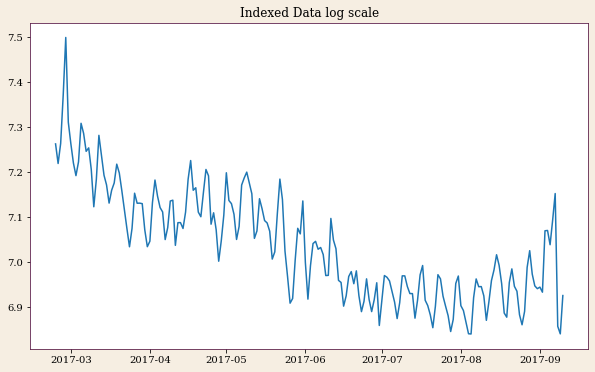

In [13]:
indexedData_logscale = np.log(indexedData)
plt.title('Indexed Data log scale')
plt.plot(indexedData_logscale)

In [14]:
aug_Dickey_Fuller_test(indexedData_logscale)

Results of Dickey-Fuller Test:
Test Statistic                  -2.117843
p-value                          0.237401
#Lags Used                      14.000000
Number of Observations Used    185.000000
Critical Value (1%)             -3.466201
Critical Value (5%)             -2.877293
Critical Value (10%)            -2.575168
dtype: float64


# Decompostion of Time Series

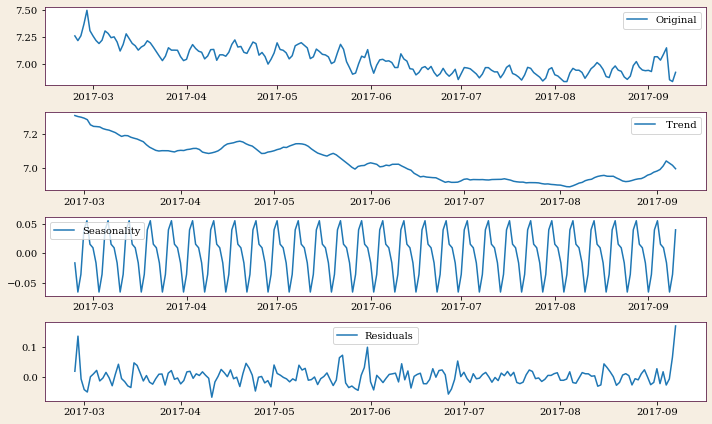

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedData_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedData_logscale,label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label= ' Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label = 'Seasonality')
plt.legend(loc= 'best')
plt.subplot(414)
plt.plot(residual, label= 'Residuals')
plt.legend(loc='best')
plt.tight_layout()

#decomposedLogData = resid
#decomposedLogData.dropna(inplace=True)
plt.show()


In [17]:
decomposedLogData = residual

# Differencing 

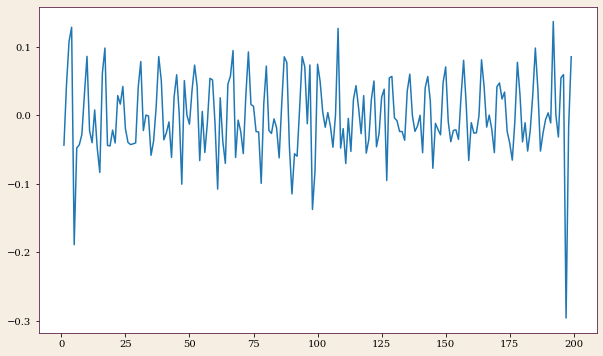

In [18]:
ts_log_diff = indexedData_logscale - indexedData_logscale.shift()
plt.plot(ts_log_diff.values)
plt.show()

In [19]:
ts_log_diff.dropna(inplace=True)
aug_Dickey_Fuller_test(ts_log_diff)


Results of Dickey-Fuller Test:
Test Statistic                  -4.248250
p-value                          0.000545
#Lags Used                      15.000000
Number of Observations Used    183.000000
Critical Value (1%)             -3.466598
Critical Value (5%)             -2.877467
Critical Value (10%)            -2.575260
dtype: float64


# Plotting ACF and PACF

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


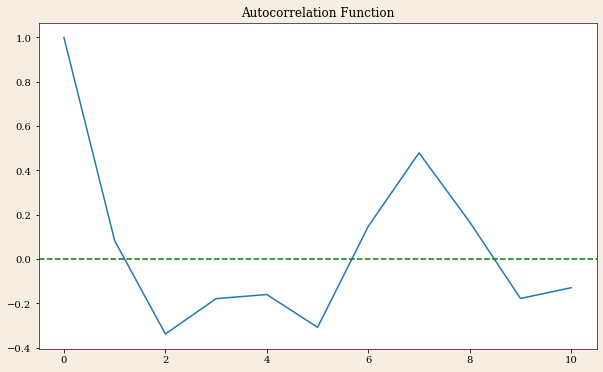

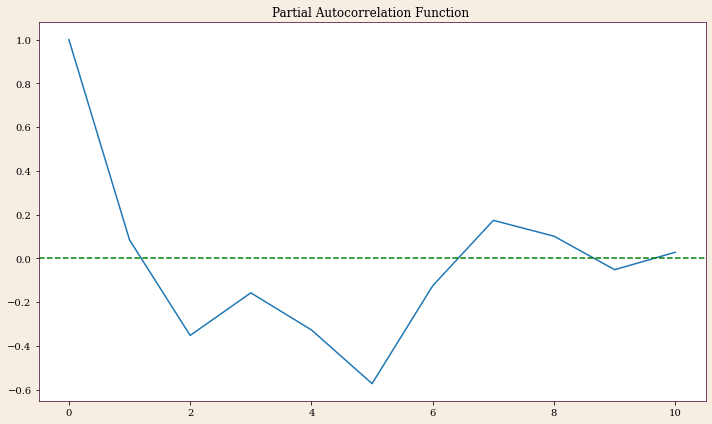

In [20]:
#plot acf anf pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

lag_acf = acf(ts_log_diff, nlags=10)
lag_pacf = pacf(ts_log_diff, nlags=10, method='ols')

#Plot ACF: 
plt.subplot(1,1,1)

plt.plot(lag_acf)
#print(lag_acf[0.5])

plt.axhline(y=0,linestyle='--',color='g')
plt.title('Autocorrelation Function')
plt.show()

#Plot PACF:
plt.subplot(1,1,1)
plt.plot(lag_pacf)

plt.axhline(y=0,linestyle='--',color='green')
plt.title('Partial Autocorrelation Function ')
plt.tight_layout()
plt.show()

# ARIMA MODEL

**Auto Regressive (AR) model**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


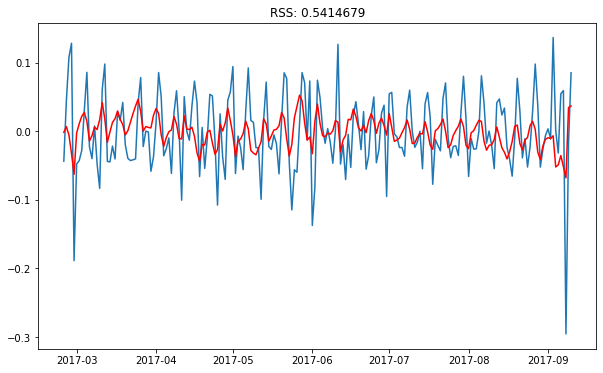

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexedData_logscale, order=(1,1,1))  
results_AR= model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((results_AR.fittedvalues-ts_log_diff['Visits'])**2))
plt.show()

**Moving Average(MA) model**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


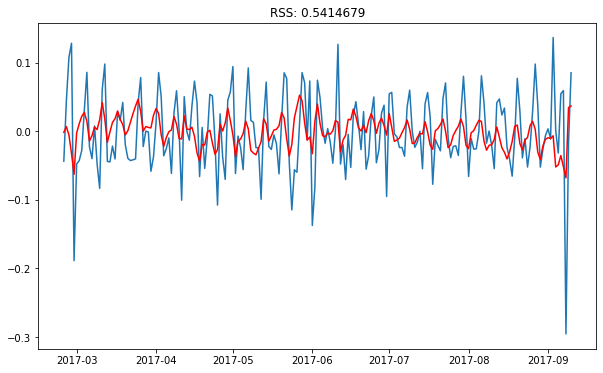

In [ ]:
#Moving Average(MA)
model = ARIMA(indexedData_logscale, order=(1,1,1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((results_MA.fittedvalues-ts_log_diff['Visits'])**2))
plt.show()

**Arima model**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


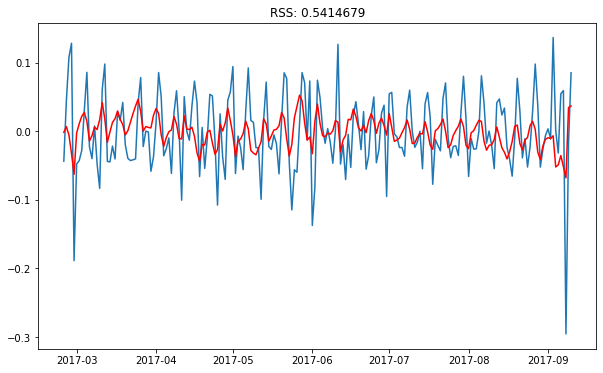

In [ ]:
model = ARIMA(indexedData_logscale, order=(1,1,1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff['Visits'])**2))
plt.show()

In [ ]:
from pandas import DataFrame
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.Visits   No. Observations:                  199
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 305.852
Method:                       css-mle   S.D. of innovations              0.052
Date:                Sat, 10 Apr 2021   AIC                           -603.703
Time:                        08:59:41   BIC                           -590.530
Sample:                    02-24-2017   HQIC                          -598.372
                         - 09-10-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0016      0.001     -2.222      0.027      -0.003      -0.000
ar.L1.D.Visits     0.5929      0.075      7.938      0.000       0.447       0.739
ma.L1.D.Visits    -0.9242      0.034

In [ ]:
path = os.path.join(baseDir, datasets, 'test_data.csv')
test_data = pd.read_csv(path)
test_data

,Page,2018010100,2018010200,2018010300,2018010400,2018010500,2018010600,2018010700,2018010800,2018010900,2018011000,2018011100,2018011200,2018011300,2018011400,2018011500,2018011600,2018011700,2018011800,2018011900,2018012000,2018012100,2018012200,2018012300,2018012400,2018012500,2018012600,2018012700,2018012800,2018012900,2018013000,2018013100,2018020100,2018020200,2018020300,2018020400,2018020500,2018020600,2018020700,2018020800,...,2019112200,2019112300,2019112400,2019112500,2019112600,2019112700,2019112800,2019112900,2019113000,2019120100,2019120200,2019120300,2019120400,2019120500,2019120600,2019120700,2019120800,2019120900,2019121000,2019121100,2019121200,2019121300,2019121400,2019121500,2019121600,2019121700,2019121800,2019121900,2019122000,2019122100,2019122200,2019122300,2019122400,2019122500,2019122600,2019122700,2019122800,2019122900,2019123000,2019123100
0,黒い霧事件_(日本プロ野球)_ja.wikipedia_desktop_all-agents,154.0,128.0,160.0,208.0,322.0,218.0,168.0,353.0,248.0,201.0,119.0,169.0,115.0,108.0,220.0,171.0,154.0,151.0,232.0,106.0,253.0,677.0,231.0,249.0,521.0,184.0,247.0,192.0,207.0,340.0,190.0,166.0,393.0,237.0,263.0,330.0,189.0,275.0,313.0,...,121.0,52.0,99.0,592.0,252.0,279.0,711.0,236.0,95.0,129.0,144.0,386.0,880.0,581.0,358.0,159.0,125.0,311.0,178.0,185.0,124.0,143.0,62.0,107.0,195.0,140.0,116.0,97.0,114.0,88.0,83.0,134.0,135.0,173.0,116.0,137.0,82.0,80.0,80.0,87.0
1,笹川陽平_ja.wikipedia_desktop_all-agents,38.0,77.0,78.0,65.0,75.0,51.0,63.0,64.0,87.0,91.0,115.0,86.0,52.0,59.0,75.0,63.0,108.0,94.0,70.0,65.0,62.0,91.0,67.0,97.0,92.0,93.0,71.0,58.0,104.0,118.0,109.0,80.0,84.0,57.0,89.0,125.0,160.0,95.0,102.0,...,61.0,56.0,50.0,76.0,70.0,187.0,118.0,125.0,49.0,60.0,95.0,86.0,91.0,91.0,97.0,74.0,52.0,152.0,194.0,172.0,87.0,72.0,50.0,39.0,82.0,74.0,82.0,110.0,75.0,72.0,52.0,118.0,105.0,125.0,100.0,404.0,54.0,45.0,51.0,56.0
2,バンジージャンプ_ja.wikipedia_desktop_all-agents,21.0,16.0,19.0,26.0,35.0,48.0,87.0,54.0,33.0,38.0,38.0,22.0,28.0,16.0,26.0,38.0,16.0,29.0,23.0,38.0,21.0,26.0,25.0,13.0,23.0,21.0,31.0,11.0,48.0,19.0,31.0,26.0,23.0,17.0,27.0,41.0,34.0,25.0,27.0,...,29.0,30.0,31.0,31.0,46.0,29.0,38.0,45.0,32.0,35.0,26.0,45.0,36.0,36.0,30.0,30.0,25.0,31.0,44.0,39.0,39.0,29.0,15.0,24.0,41.0,30.0,23.0,25.0,40.0,26.0,26.0,27.0,40.0,25.0,31.0,31.0,21.0,33.0,20.0,22.0
3,バック・トゥ・ザ・フューチャー_ja.wikipedia_desktop_all-agents,232.0,306.0,340.0,318.0,271.0,292.0,396.0,386.0,341.0,374.0,358.0,329.0,316.0,346.0,341.0,428.0,365.0,377.0,341.0,324.0,320.0,392.0,412.0,286.0,353.0,349.0,326.0,366.0,358.0,418.0,363.0,365.0,384.0,383.0,377.0,361.0,367.0,355.0,321.0,...,467.0,417.0,442.0,425.0,394.0,475.0,344.0,528.0,399.0,522.0,435.0,408.0,378.0,428.0,401.0,414.0,404.0,370.0,431.0,349.0,489.0,492.0,417.0,359.0,420.0,436.0,418.0,482.0,423.0,1083.0,527.0,592.0,497.0,470.0,502.0,535.0,478.0,502.0,2007.0,1336.0
4,メーガン・マークル_ja.wikipedia_desktop_all-agents,199.0,128.0,197.0,164.0,200.0,200.0,603.0,327.0,301.0,215.0,234.0,1200.0,499.0,263.0,439.0,758.0,404.0,641.0,512.0,162.0,203.0,259.0,175.0,173.0,155.0,137.0,117.0,151.0,242.0,122.0,142.0,136.0,177.0,125.0,90.0,105.0,151.0,164.0,163.0,...,7.0,6.0,8.0,7.0,10.0,8.0,8.0,16.0,10.0,8.0,13.0,12.0,7.0,11.0,8.0,11.0,12.0,11.0,3.0,6.0,8.0,6.0,8.0,8.0,8.0,13.0,5.0,5.0,5.0,11.0,5.0,7.0,5.0,7.0,8.0,10.0,9.0,7.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63851,User:Kingchang711_zh.wikipedia_all-access_spider,0.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,4.0,0.0,1.0,NaN,1.0,11.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,NaN,2.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0,1.0,NaN,1.0,2.0,NaN,0.0,...,NaN,1.0,3.0,1.0,NaN,2.0,NaN,NaN,1.0,0.0,0.0,1.0,3.0,1.0,3.0,NaN,3.0,1.0,NaN,NaN,2.0,1.0,2.0,NaN,1.0,NaN,3.0,NaN,1.0,1.0,1.0,NaN,NaN,0.0,NaN,NaN,5.0,3.0,1.0,NaN
63852,User:Caoli

In [ ]:
test_details = test_data.Page.str.extract(r'(?P<topic>.*)\_(?P<lang>.*).wikipedia\_(?P<access>.*)\_(?P<type>.*)')

test_data = pd.concat([test_details, test_data], axis=1)
test_data



,topic,lang,access,type,Page,2018010100,2018010200,2018010300,2018010400,2018010500,2018010600,2018010700,2018010800,2018010900,2018011000,2018011100,2018011200,2018011300,2018011400,2018011500,2018011600,2018011700,2018011800,2018011900,2018012000,2018012100,2018012200,2018012300,2018012400,2018012500,2018012600,2018012700,2018012800,2018012900,2018013000,2018013100,2018020100,2018020200,2018020300,2018020400,...,2019112200,2019112300,2019112400,2019112500,2019112600,2019112700,2019112800,2019112900,2019113000,2019120100,2019120200,2019120300,2019120400,2019120500,2019120600,2019120700,2019120800,2019120900,2019121000,2019121100,2019121200,2019121300,2019121400,2019121500,2019121600,2019121700,2019121800,2019121900,2019122000,2019122100,2019122200,2019122300,2019122400,2019122500,2019122600,2019122700,2019122800,2019122900,2019123000,2019123100
0,黒い霧事件_(日本プロ野球),ja,desktop,all-agents,黒い霧事件_(日本プロ野球)_ja.wikipedia_desktop_all-agents,154.0,128.0,160.0,208.0,322.0,218.0,168.0,353.0,248.0,201.0,119.0,169.0,115.0,108.0,220.0,171.0,154.0,151.0,232.0,106.0,253.0,677.0,231.0,249.0,521.0,184.0,247.0,192.0,207.0,340.0,190.0,166.0,393.0,237.0,263.0,...,121.0,52.0,99.0,592.0,252.0,279.0,711.0,236.0,95.0,129.0,144.0,386.0,880.0,581.0,358.0,159.0,125.0,311.0,178.0,185.0,124.0,143.0,62.0,107.0,195.0,140.0,116.0,97.0,114.0,88.0,83.0,134.0,135.0,173.0,116.0,137.0,82.0,80.0,80.0,87.0
1,笹川陽平,ja,desktop,all-agents,笹川陽平_ja.wikipedia_desktop_all-agents,38.0,77.0,78.0,65.0,75.0,51.0,63.0,64.0,87.0,91.0,115.0,86.0,52.0,59.0,75.0,63.0,108.0,94.0,70.0,65.0,62.0,91.0,67.0,97.0,92.0,93.0,71.0,58.0,104.0,118.0,109.0,80.0,84.0,57.0,89.0,...,61.0,56.0,50.0,76.0,70.0,187.0,118.0,125.0,49.0,60.0,95.0,86.0,91.0,91.0,97.0,74.0,52.0,152.0,194.0,172.0,87.0,72.0,50.0,39.0,82.0,74.0,82.0,110.0,75.0,72.0,52.0,118.0,105.0,125.0,100.0,404.0,54.0,45.0,51.0,56.0
2,バンジージャンプ,ja,desktop,all-agents,バンジージャンプ_ja.wikipedia_desktop_all-agents,21.0,16.0,19.0,26.0,35.0,48.0,87.0,54.0,33.0,38.0,38.0,22.0,28.0,16.0,26.0,38.0,16.0,29.0,23.0,38.0,21.0,26.0,25.0,13.0,23.0,21.0,31.0,11.0,48.0,19.0,31.0,26.0,23.0,17.0,27.0,...,29.0,30.0,31.0,31.0,46.0,29.0,38.0,45.0,32.0,35.0,26.0,45.0,36.0,36.0,30.0,30.0,25.0,31.0,44.0,39.0,39.0,29.0,15.0,24.0,41.0,30.0,23.0,25.0,40.0,26.0,26.0,27.0,40.0,25.0,31.0,31.0,21.0,33.0,20.0,22.0
3,バック・トゥ・ザ・フューチャー,ja,desktop,all-agents,バック・トゥ・ザ・フューチャー_ja.wikipedia_desktop_all-agents,232.0,306.0,340.0,318.0,271.0,292.0,396.0,386.0,341.0,374.0,358.0,329.0,316.0,346.0,341.0,428.0,365.0,377.0,341.0,324.0,320.0,392.0,412.0,286.0,353.0,349.0,326.0,366.0,358.0,418.0,363.0,365.0,384.0,383.0,377.0,...,467.0,417.0,442.0,425.0,394.0,475.0,344.0,528.0,399.0,522.0,435.0,408.0,378.0,428.0,401.0,414.0,404.0,370.0,431.0,349.0,489.0,492.0,417.0,359.0,420.0,436.0,418.0,482.0,423.0,1083.0,527.0,592.0,497.0,470.0,502.0,535.0,478.0,502.0,2007.0,1336.0
4,メーガン・マークル,ja,desktop,all-agents,メーガン・マークル_ja.wikipedia_desktop_all-agents,199.0,128.0,197.0,164.0,200.0,200.0,603.0,327.0,301.0,215.0,234.0,1200.0,499.0,263.0,439.0,758.0,404.0,641.0,512.0,162.0,203.0,259.0,175.0,173.0,155.0,137.0,117.0,151.0,242.0,122.0,142.0,136.0,177.0,125.0,90.0,...,7.0,6.0,8.0,7.0,10.0,8.0,8.0,16.0,10.0,8.0,13.0,12.0,7.0,11.0,8.0,11.0,12.0,11.0,3.0,6.0,8.0,6.0,8.0,8.0,8.0,13.0,5.0,5.0,5.0,11.0,5.0,7.0,5.0,7.0,8.0,10.0,9.0,7.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63851,User:Kingchang711,zh,all-access,spider,User:Kingchang711_zh.wikipedia_all-access_spider,0.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,4.0,0.0,1.0,NaN,1.0,11.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,NaN,2.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0,1.0,NaN,...,NaN,1.0,3.0,1.0,NaN,2.0,NaN,NaN,1.0,0.0,0.0,1.0,3.0,1.0,3.0,NaN,3.0,1.0,NaN,NaN,2.0,1.0,2.0,NaN,1.0,NaN,3.0,NaN,1.0,1.0,1.0,

In [ ]:
path = os.path.join(baseDir, datasets, 'train_data.csv')
traindf = pd.read_csv(path)
traindf

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,...,2017-08-02,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,2017-08-16,2017-08-17,2017-08-18,2017-08-19,2017-08-20,2017-08-21,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-26,2017-08-27,2017-08-28,2017-08-29,2017-08-30,2017-08-31,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,...,46.0,24.0,22.0,22.0,11.0,25.0,45.0,39.0,17.0,18.0,13.0,57.0,18.0,14.0,19.0,39.0,22.0,16.0,28.0,21.0,37.0,58.0,25.0,23.0,25.0,47.0,44.0,26.0,24.0,21.0,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,...,39.0,20.0,31.0,19.0,7.0,11.0,20.0,13.0,16.0,16.0,47.0,21.0,20.0,12.0,13.0,20.0,22.0,20.0,12.0,37.0,14.0,34.0,16.0,31.0,34.0,33.0,32.0,29.0,34.0,25.0,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,...,22.0,8.0,4.0,3.0,1.0,3.0,7.0,3.0,1.0,9.0,4.0,2.0,6.0,3.0,3.0,3.0,8.0,2.0,4.0,3.0,6.0,23.0,11.0,8.0,6.0,13.0,12.0,8.0,12.0,9.0,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,...,37.0,14.0,12.0,13.0,11.0,10.0,14.0,15.0,15.0,11.0,19.0,9.0,19.0,8.0,17.0,11.0,18.0,20.0,11.0,11.0,21.0,42.0,23.0,17.0,11.0,21.0,20.0,20.0,110.0,15.0,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,39.0,66.0,114.0,19.0,29.0,12.0,11.0,14.0,14.0,63.0,12.0,22.0,14.0,20.0,11.0,23.0,66.0,19.0,23.0,23.0,41.0,25.0,22.0,20.0,24.0,29.0,20.0,17.0,24.0,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,2.0,3.0,4.0,3.0,2.0,2.0,0.0,3.0,1.0,1.0,0.0,2.0,2.0,1.0,6.0,2.0,3.0,3.0,2.0,7.0,6.0,8.0,5.0,7.0,7.0,7.0,8.0,2.0,0.0,4.0,3.0,6.0,5.0,2.0,4.0,4.0,8.0,2.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,6.0,1.0,2.0,3.0,3.0,18.0,4.0,5.0,3.0,2.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,3.0,9.0,10.0,8.0,6.0,3.0,9.0,2.0,11.0,3.0,3.0,4.0,4.0,7.0

In [ ]:
page_details = traindf.Page.str.extract(r'(?P<topic>.*)\_(?P<lang>.*).wikipedia.org\_(?P<access>.*)\_(?P<type>.*)')

page_details[0:10]
traindf = pd.concat([page_details, traindf], axis=1)
traindf

,topic,lang,access,type,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,...,2017-08-02,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,2017-08-16,2017-08-17,2017-08-18,2017-08-19,2017-08-20,2017-08-21,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-26,2017-08-27,2017-08-28,2017-08-29,2017-08-30,2017-08-31,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1,zh,all-access,spider,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,...,46.0,24.0,22.0,22.0,11.0,25.0,45.0,39.0,17.0,18.0,13.0,57.0,18.0,14.0,19.0,39.0,22.0,16.0,28.0,21.0,37.0,58.0,25.0,23.0,25.0,47.0,44.0,26.0,24.0,21.0,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM,zh,all-access,spider,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,...,39.0,20.0,31.0,19.0,7.0,11.0,20.0,13.0,16.0,16.0,47.0,21.0,20.0,12.0,13.0,20.0,22.0,20.0,12.0,37.0,14.0,34.0,16.0,31.0,34.0,33.0,32.0,29.0,34.0,25.0,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C,zh,all-access,spider,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,...,22.0,8.0,4.0,3.0,1.0,3.0,7.0,3.0,1.0,9.0,4.0,2.0,6.0,3.0,3.0,3.0,8.0,2.0,4.0,3.0,6.0,23.0,11.0,8.0,6.0,13.0,12.0,8.0,12.0,9.0,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute,zh,all-access,spider,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,...,37.0,14.0,12.0,13.0,11.0,10.0,14.0,15.0,15.0,11.0,19.0,9.0,19.0,8.0,17.0,11.0,18.0,20.0,11.0,11.0,21.0,42.0,23.0,17.0,11.0,21.0,20.0,20.0,110.0,15.0,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You,zh,all-access,spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,39.0,66.0,114.0,19.0,29.0,12.0,11.0,14.0,14.0,63.0,12.0,22.0,14.0,20.0,11.0,23.0,66.0,19.0,23.0,23.0,41.0,25.0,22.0,20.0,24.0,29.0,20.0,17.0,24.0,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas),es,all-access,spider,Underworld_(serie_de_películas)_es.wikipedia.o...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,2.0,3.0,4.0,3.0,2.0,2.0,0.0,3.0,1.0,1.0,0.0,2.0,2.0,1.0,6.0,2.0,3.0,3.0,2.0,7.0,6.0,8.0,5.0,7.0,7.0,7.0,8.0,2.0,0.0,4.0,3.0,6.0,5.0,2.0,4.0,4.0,8.0,2.0
145059,Resident_Evil:_Capítulo_Final,es,all-access,spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,6.0,1.0,2.0,3.0,3.0,18

In [ ]:
traindf.topic[(traindf.topic == 'バンジージャンプ') & (traindf.lang == 'ja') & (traindf.access == 'desktop') & (traindf.type == 'all-agents')].index.tolist(), test_data.topic[(test_data.topic == 'バンジージャンプ') & (test_data.lang == 'ja') & (test_data.access == 'desktop') & (test_data.type == 'all-agents')].index.tolist()

([86022], [2])

In [ ]:
def extract_series(df, row_num, start_idx):
    y = df.iloc[row_num, start_idx:]
    df = pd.DataFrame({ 'ds': y.index, 'y': y.values})
    return df

In [ ]:
df_actual = extract_series(test_data, 2, 5)
df_train = extract_series(traindf, 86022, 5)

In [ ]:
dates = list(df_actual.ds)
for _ in range(len(dates)):
 var = list(dates[_])
 dates[_] = ''.join(var[:4]) + '-' + ''.join(var[4:6]) + '-' + ''.join(var[6:8])
df_actual.drop(columns = ['ds'], inplace = True)
df_actual.insert(0, 'ds', value = dates)

In [ ]:
df_train['ds'] = pd.to_datetime(df_train['ds'])
df_actual['ds'] = pd.to_datetime(df_actual['ds'])

In [ ]:
def plot_prediction_and_actual_2(train, forecast, actual, xlim=None, ylim=None, figSize=None, title=None):
    fig, ax  = plt.subplots(1,1,figsize=figSize)
    ax.plot(pd.to_datetime(train.index), train.values, 'k.')
    ax.plot(pd.to_datetime(actual.index), actual.values, 'r.')
    ax.plot(pd.to_datetime(forecast.index), forecast.values, 'b-')
    plt.title(title, fontweight = 'bold', fontsize = 20)
    plt.xlabel("Time", fontsize = 15, fontweight = 'bold')
    plt.ylabel("Views", fontsize = 15, fontweight = 'bold')
    plt.show()

In [ ]:
df_train.iloc[449, 1] = 0
# df_train[df_train['y'] > 15000]

In [ ]:
df_actual = df_actual.iloc[:180, :]

In [ ]:
def arima_model(df_train, df_actual, p, d, q, figSize=(25, 4), review=False):
    df_train = df_train.fillna(0)
    train_series = df_train.y
    train_series.index = df_train.ds

    result = None
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        try:
            arima = ARIMA(train_series ,[p, d, q])
            result = arima.fit(disp=False)
        except Exception as e:
            print('\tARIMA failed', e)
                
    start_idx = df_train.ds[d]
    end_idx = df_actual.ds.max()
    forecast_series = result.predict(start_idx, end_idx, typ='levels')
    # print(forecast_series[-180:])
    actual_series = df_actual.y
    actual_series.index = pd.to_datetime(df_actual.ds)
    def smape(A, F):
      print(100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F))))

    if(review):
        plot_prediction_and_actual_2(train_series, forecast_series, actual_series, figSize=figSize, title='ARIMA MODEL')

    print("\n\n\n", mean_absolute_error(list(forecast_series[-180:]), actual_series),mean_squared_error(list(forecast_series[-180:]), actual_series), np.sqrt(mean_squared_error(list(forecast_series[-180:]), actual_series)))
    smape(np.array(list(actual_series)),np.array(list(forecast_series[-180:])))


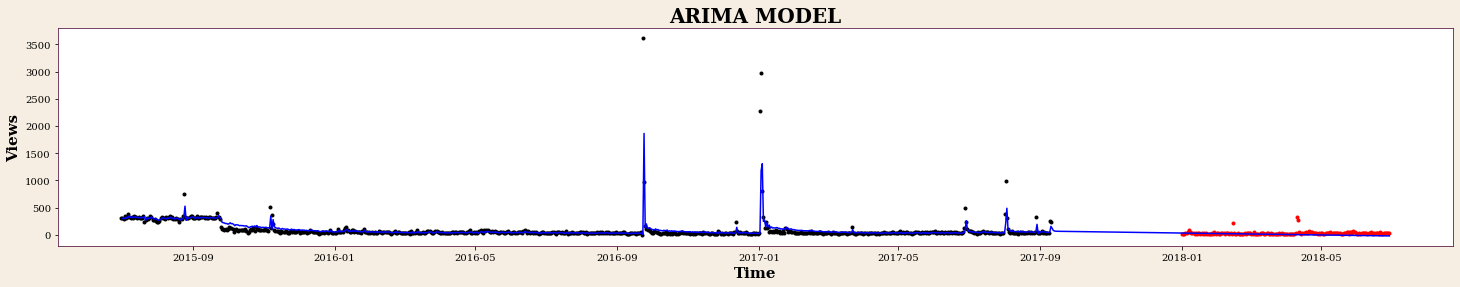




 28.31828280813462 2110.667360547435 45.94199996242474
115.83997053014689


In [ ]:
arima_model(df_train.copy(), df_actual.copy(), 2, 1, 2, review=True)